# Light Python Deep Learning Tutorial
This is a very simple and light tutorial focused towards developers
![caption](http://images7.alphacoders.com/317/317204.jpg)

## Let's Grab Some Data! Hello World Deep Learning Example ~ MNIST 

In [2]:
from sklearn import datasets
import numpy as np
dataset = datasets.fetch_mldata("MNIST Original")
X = dataset.data
Y = dataset.target

# Introduce concept of a tensor

In [3]:
X_tensor = X.reshape((X.shape[0],1,28,28))
print "We have reshaped",X.shape,"into",X_tensor.shape,"\nThis is the format we want for convolutional nets"

We have reshaped (70000, 784) into (70000, 1, 28, 28) 
This is the format we want for convolutional nets


In [4]:
from sklearn.cross_validation import StratifiedKFold
stratified_k_fold_splits = StratifiedKFold(Y, n_folds=7,shuffle=True)
for train_index, test_index in stratified_k_fold_splits: break  #Just take for the first one

In [7]:
from keras.utils import np_utils 
print Y[train_index]
np.random.shuffle(train_index)     # Index shuffle not working? Force here
np.random.shuffle(test_index)      # Index shuffle not working? Force here
print Y[train_index]
X_train, Y_train = X_tensor[train_index], Y[train_index]
X_test, Y_test = X_tensor[test_index], Y[test_index]

nb_classes=10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

[ 3.  1.  9. ...,  1.  3.  3.]
[ 0.  9.  4. ...,  6.  0.  7.]


(-0.5, 279.5, 27.5, -0.5)

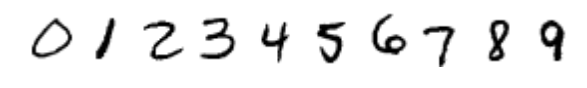

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
for number in range(0,10):
    if number==0:
        image_stack = X_train[np.argmax(Y_train,axis=1)==number][0][0]
    else:
        image_stack = np.hstack((image_stack,X_train[np.argmax(Y_train,axis=1)==number][0][0]))
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.imshow(image_stack,cmap=plt.get_cmap('gray_r'))
plt.axis('off')

In [9]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

Using Theano backend.
Using gpu device 0: GRID K520 (CNMeM is disabled)


In [12]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

img_rows, img_cols = 28, 28
nb_filters = 32
nb_pool = 2
nb_conv = 3

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [13]:
batch_size = 128
nb_epoch = 5

model.fit(X_train, Y_train, 
          batch_size=128, 
          nb_epoch=5,
          show_accuracy=True, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 59996 samples, validate on 10004 samples
Epoch 1/5
59996/59996 [==============================] - 29s - loss: 10.6110 - acc: 0.3392 - val_loss: 5.3854 - val_acc: 0.6633
Epoch 2/5
59996/59996 [==============================] - 29s - loss: 3.1859 - acc: 0.7968 - val_loss: 1.1258 - val_acc: 0.9272
Epoch 3/5
 2304/59996 [>.............................] - ETA: 27s - loss: 1.8407 - acc: 0.8837

KeyboardInterrupt: 

# Data Augmentation

In [14]:
# Augmenting the data
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

# fit the model on the batches generated by datagen.flow()
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=nb_epoch, show_accuracy=True,
                    validation_data=(X_test, Y_test),
                    nb_worker=4)

Epoch 1/5
22144/59996 [==========>...................] - ETA: 21s - loss: 2.5467 - acc: 0.8373

KeyboardInterrupt: 

# COLOR examples

In [16]:
# Load COLOR example
'''Train a simple deep CNN on the CIFAR10 small images dataset.

GPU run command:
    THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python cifar10_cnn.py

It gets down to 0.65 test logloss in 25 epochs, and down to 0.55 after 50 epochs.
(it's still underfitting at that point, though).

Note: the data was pickled with Python 2, and some encoding issues might prevent you
from loading it in Python 3. You might have to load it in Python 2,
save it in a different format, load it in Python 3 and repickle it.
'''

from keras.datasets import cifar10

batch_size = 32
nb_classes = 10
nb_epoch = 200
data_augmentation = True

# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB
img_channels = 3

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

('X_train shape:', (50000, 3, 32, 32))
(50000, 'train samples')
(10000, 'test samples')


In [22]:
X_train[0].shape

(3, 32, 32)

In [21]:
np.transpose(X_train[0],axes=[1,2,0]).shape

(32, 32, 3)

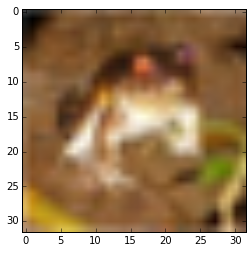

In [23]:
plt.imshow(np.transpose(X_train[0],axes=[1,2,0]))

In [18]:
from keras.optimizers import SGD
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# let's train the model using SGD + momentum (how original).
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# this will do preprocessing and realtime data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

# fit the model on the batches generated by datagen.flow()
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=nb_epoch, show_accuracy=True,
                    validation_data=(X_test, Y_test),
                    nb_worker=1)

Epoch 1/200
13568/50000 [=======>......................] - ETA: 66s - loss: 1.9980 - acc: 0.2522

KeyboardInterrupt: 

(-0.5, 95.5, 31.5, -0.5)

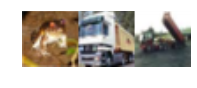

In [24]:
fig=plt.gcf()
fig.set_size_inches(3,1)
im1=np.array(np.transpose(X_train[0],axes=[1,2,0]))
im2=np.array(np.transpose(X_train[1],axes=[1,2,0]))
im3=np.array(np.transpose(X_train[2],axes=[1,2,0]))
plt.imshow(np.hstack((im1,im2,im3)))
plt.axis("off")

# Julia example

In [ ]:
using Mocha
srand(12345678)

data_layer  = AsyncHDF5DataLayer(name="train-data", source="data/train.txt", batch_size=64, shuffle=true)
conv_layer  = ConvolutionLayer(name="conv1", n_filter=20, kernel=(5,5), bottoms=[:data], tops=[:conv])
pool_layer  = PoolingLayer(name="pool1", kernel=(2,2), stride=(2,2), bottoms=[:conv], tops=[:pool])
conv2_layer = ConvolutionLayer(name="conv2", n_filter=50, kernel=(5,5), bottoms=[:pool], tops=[:conv2])
pool2_layer = PoolingLayer(name="pool2", kernel=(2,2), stride=(2,2), bottoms=[:conv2], tops=[:pool2])
fc1_layer   = InnerProductLayer(name="ip1", output_dim=500, neuron=Neurons.ReLU(), bottoms=[:pool2], tops=[:ip1])
fc2_layer   = InnerProductLayer(name="ip2", output_dim=10, bottoms=[:ip1], tops=[:ip2])
loss_layer  = SoftmaxLossLayer(name="loss", bottoms=[:ip2,:label])

backend = DefaultBackend()
init(backend)

common_layers = [conv_layer, pool_layer, conv2_layer, pool2_layer, fc1_layer, fc2_layer]
net = Net("MNIST-train", backend, [data_layer, common_layers..., loss_layer])

exp_dir = "snapshots-$(Mocha.default_backend_type)"

method = SGD()
params = make_solver_parameters(method, max_iter=10000, regu_coef=0.0005,
                                mom_policy=MomPolicy.Fixed(0.9),
                                lr_policy=LRPolicy.Inv(0.01, 0.0001, 0.75),
                                load_from=exp_dir)
solver = Solver(method, params)

setup_coffee_lounge(solver, save_into="$exp_dir/statistics.jld", every_n_iter=1000)

# report training progress every 100 iterations
add_coffee_break(solver, TrainingSummary(), every_n_iter=100)

# save snapshots every 5000 iterations
add_coffee_break(solver, Snapshot(exp_dir), every_n_iter=5000)

# show performance on test data every 1000 iterations
data_layer_test = HDF5DataLayer(name="test-data", source="data/test.txt", batch_size=100)
acc_layer = AccuracyLayer(name="test-accuracy", bottoms=[:ip2, :label])
test_net = Net("MNIST-test", backend, [data_layer_test, common_layers..., acc_layer])
add_coffee_break(solver, ValidationPerformance(test_net), every_n_iter=1000)

solve(solver, net)

#Profile.init(int(1e8), 0.001)
#@profile solve(solver, net)
#open("profile.txt", "w") do out
#  Profile.print(out)
#end

destroy(net)
destroy(test_net)
shutdown(backend)